**Author:** Deepa Anjanamurthy

**Project**: Exchange Explorer (Capstone - Data Science)

### **Table of Contents**

- [**1. Introduction**](#intro)
    * [**Data Dictionary**](#dd)
- [**2. Setup**](#setup)
    * [**Importing Libraries**](#libimports)
- [**3. Data Cleaning and EDA**](#EDA)
    * [**1.1**](#part-1-1)
    * [**1.2**](#part-1-2)
        
- [**Part 2**](#part-2)
    * [**2.1**](#part-2-1)
    * [**2.2**](#part-2-2)
    
- [**Part 3**](#part-3)
    * [**3.1**](#part-3-1) 
    * [**3.2**](#part-3-2)

- [**Part 4**](#part-4)
    * [**4.1**](#part-4-1) 
    * [**4.2**](#part-4-2)

- [**Part 5**](#part-5)
    * [**5.1**](#part-5-1) 
    * [**5.2**](#part-5-2)


<a class="anchor" id="intro"></a>
### Introduction to Exchange Explorer!

In this project, **"Exchange Explorer: Predictive Analytics for USD Fluctuations,"** we dive into the fascinating world of currency exchange rates, focusing on the US Dollar (USD) — a key player in global finance. The USD's influence stretches far and wide, affecting everything from international trade to personal investment decisions. Our goal is to sift through historical exchange rate data, uncover patterns, and predict future movements using the machine learning techniques. 

This isn't just about crunching numbers; it's about providing valuable insights for investors, financial analysts, and policymakers to make informed decisions in a complex market. Through a careful blend of analysis and technology, "Exchange Explorer" aims to shed light on the dynamics of forex markets, making them more understandable and navigable for everyone involved.



<a class="anchor" id="dd"></a>

### Data Dictionary

This dataset offers a comprehensive view of daily currency exchange rates, from 2008 to 2023. Currency rates can be affected by various factors, including interest rates, inflation, political instability, economic performance, and global market developments. Understanding these rates over time can provide valuable insights into economic trends, market behaviors, and the impacts of global events on currency values.

The currency pairs included in this dataset are:
- USD to INR (INR=X)
- USD to JPY (JPY=X)
- USD to EUR (EUR=X)
- USD to GBP (GBP=X)
- USD to AUD (AUD=X)
- USD to CAD (CAD=X)
- USD to CHF (CHF=X)
- USD to CNY (CNY=X)
- USD to HKD (HKD=X)
- USD to SGD (SGD=X)

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Data Type</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
 </tr>
  <tr>
    <td style="text-align: left"> <code>Ticker</code> </td>
    <td style="text-align: left">str</td>
    <td style="text-align: left">The currency pair being represented.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Date</code></td>
    <td style="text-align: left">str</td>
    <td style="text-align: left">The date in YYYY-MM-DD format.</td>
  </tr>
    
  <tr>
    <td style="text-align: left"> <code>Open</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The opening exchange rate of the day.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>High</code></td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The highest exchange rate of the day.</td>
  </tr>
    
  <tr>
    <td style="text-align: left"> <code>Low</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The lowest exchange rate of the day.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Close</code></td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The closing exchange rate of the day.</td>
  </tr>

  <tr>
    <td style="text-align: left"> <code>Adj Close</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The adjusted closing exchange rate of the day.</td>
  </tr>
  
  <tr>
    <td style="text-align: left"> <code>Volume</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The volume of the currency traded on that day.</td>
  </tr>

<a class="anchor" id="setup"></a>

### Setup

<a class="anchor" id="libimports"></a>

Library imports necessary for running the analysis 

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a baseline model
from sklearn.linear_model import LogisticRegression

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV


<a class="anchor" id="EDA"></a>
### Data Cleaning and EDA

The dataset contains 15 years of data separated by the year - **2008 to 2023**. The data spans from Aug 2008 to July 2023. These separate files have been combined into one csv file  for ease and is being used for analysis.

In [3]:
# Load the data
df = pd.read_csv('combined_usd_exchange_rates.csv')

In [4]:
# Check if the dataframe data
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,GBP=X,2008-08-01,0.50441,0.5068,0.50396,0.50651,0.50651,0.0
1,AUD=X,2008-08-01,1.06430,1.0765,1.06390,1.07270,1.07270,0.0
2,CAD=X,2008-08-01,1.02340,1.0294,1.02290,1.02460,1.02460,0.0
3,CHF=X,2008-08-01,1.04800,1.0512,1.04640,1.05040,1.05040,0.0
4,CNY=X,2008-08-01,6.83600,6.8554,6.82100,6.84700,6.84700,0.0


In [5]:
# Check the shape - no. of rows and columns in the dataframe
df.shape

(38982, 8)

In [22]:
# Check the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     38982 non-null  object        
 1   Date       38982 non-null  datetime64[ns]
 2   Open       38982 non-null  float64       
 3   High       38982 non-null  float64       
 4   Low        38982 non-null  float64       
 5   Close      38982 non-null  float64       
 6   Adj Close  38982 non-null  float64       
 7   Time       38982 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.4+ MB


The dataset contains **38982 rows and 8 columns**. Each row in the dataset represents a single day and includes the following columns:

- Ticker: The currency pair being represented. For e.g.: 'GBP=X' represents the ticker symbol of **USD to GBP** rate. There are **10** such pairs represented in the dataset.
- Date: The date in YYYY-MM-DD format.
- Open: The opening exchange rate of the day.
- High: The highest exchange rate of the day.
- Low: The lowest exchange rate of the day.
- Close: The closing exchange rate of the day.
- Adj Close: The adjusted closing exchange rate of the day.
- Volume: The volume of the currency traded on that day.

In [6]:
# Get a sample of rows in the DF
df.sample(15)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
17310,CNY=X,2015-04-03,6.187000,6.187000,6.187000,6.187000,6.187000,0.0
38937,CAD=X,2023-07-24,1.322400,1.322760,1.315420,1.322400,1.322400,0.0
2018,CHF=X,2009-05-20,1.108800,1.112600,1.097000,1.100400,1.100400,0.0
18894,JPY=X,2015-11-12,122.745003,123.064003,122.667000,122.757004,122.757004,0.0
15538,CAD=X,2014-07-30,1.085150,1.091000,1.084900,1.085030,1.085030,0.0
13489,CHF=X,2013-10-16,0.913300,0.917280,0.909700,0.913340,0.913340,0.0
5469,INR=X,2010-09-16,46.200001,46.410000,46.088001,46.200001,46.200001,0.0
38976,AUD=X,2023-07-28,1.489900,1.509707,1.490091,1.489900,1.489900,0.0
38460,HKD=X,2023-05-17,7.838300,7.838600,7.828190,7.838300,7.838300,0.0
32727,CAD=X,2021-03-05,1.267630,1.273290,1.264840,1.267790,1.267790,0.0


In [8]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


On inspecting the columns datatypes, Ticker and Date are object datatypes and the rest columns are float datatypes.

The column Date is currently an object type. In order to use the column in a time series analysis, converting this column to **datetime** data type would be necessary.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     38982 non-null  object        
 1   Date       38982 non-null  datetime64[ns]
 2   Open       38982 non-null  float64       
 3   High       38982 non-null  float64       
 4   Low        38982 non-null  float64       
 5   Close      38982 non-null  float64       
 6   Adj Close  38982 non-null  float64       
 7   Volume     38982 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.4+ MB


In [11]:
# Check unique values in the 'Volume' column
unique_volume_values = df['Volume'].unique()

# Display the unique values
print(unique_volume_values)

[0.]


In [12]:
# Drop the 'Volume' column if it's not needed
df = df.drop('Volume', axis=1)

The Volume column only has the unique value of 0, and provides no value to the analysis. Hence, this column is unnecessary as there's no variability that can be observed using this variable. Dropped this column for future analysis.

Plotting the frequency histograms

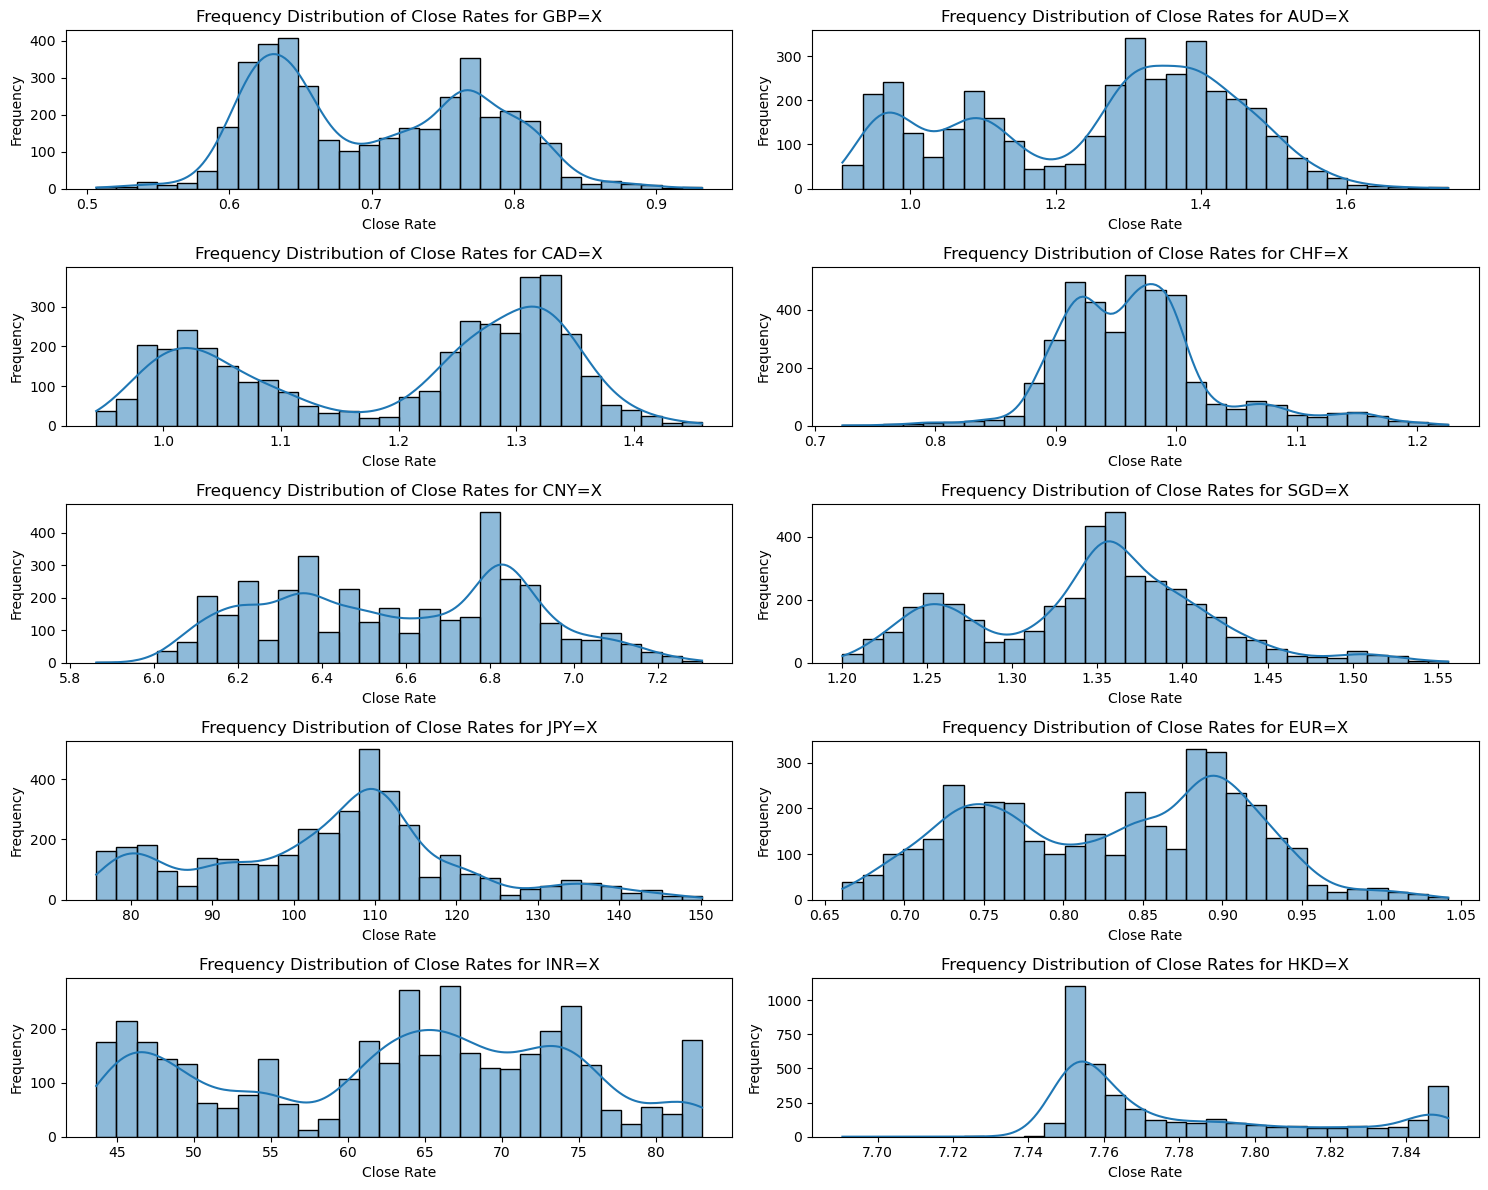

In [13]:
# Unique currency tickers
tickers = df['Ticker'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Number of rows for subplot, adjust based on the number of tickers
n_rows = len(tickers) // 2 + len(tickers) % 2

for i, ticker in enumerate(tickers, 1):
    # Filter the DataFrame for each ticker
    ticker_data = df[df['Ticker'] == ticker]
    
    # Create a subplot for each ticker
    plt.subplot(n_rows, 2, i)
    sns.histplot(ticker_data['Close'], kde=True, bins=30)
    plt.title(f'Frequency Distribution of Close Rates for {ticker}')
    plt.xlabel('Close Rate')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Exploring measures of central tendency (**mean**) of the variables

In [14]:
# Group the data by 'Ticker' and calculate mean for each currency pair
central_tendency_by_ticker = df.groupby('Ticker').agg({
#     'Open': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'Open': ['mean'],
    'Close': ['mean'],
    'Adj Close': ['mean'],
    'High': ['mean'],
    'Low': ['mean']  
    
})

# Display the mean for each currency pair
central_tendency_by_ticker

,Open,Close,Adj Close,High,Low
,mean,mean,mean,mean,mean
Ticker,,,,,
AUD=X,1.257908,1.258001,1.258001,1.264428,1.251644
CAD=X,1.198423,1.198412,1.198412,1.202731,1.194271
CHF=X,0.967206,0.967181,0.967181,0.970989,0.963413
CNY=X,6.587017,6.587329,6.587329,6.596036,6.576680
EUR=X,0.828949,0.828978,0.828978,0.832197,0.825921
GBP=X,0.702123,0.702135,0.702135,0.705247,0.699425
HKD=X,7.780899,7.780890,7.780890,7.782881,7.778799
INR=X,62.942183,62.946545,62.946545,63.170480,62.734809


#### Log Transformation plots

Re-plotting log transformed frequency distributions:

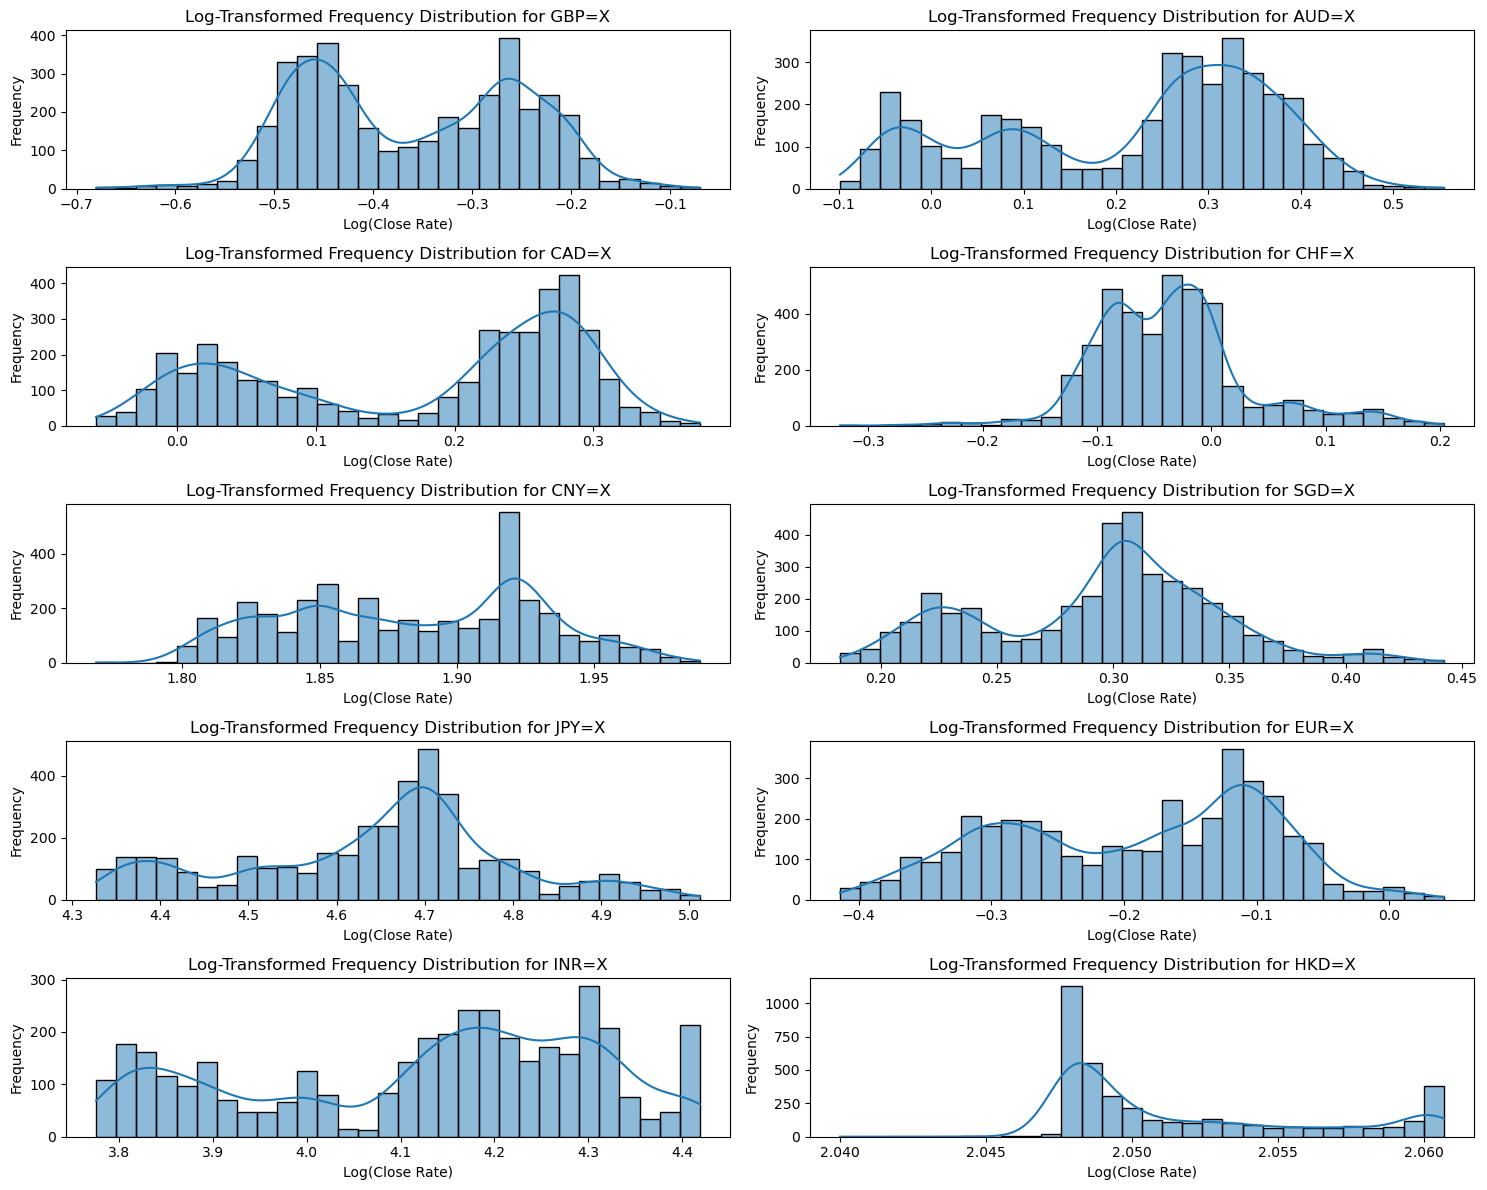

In [15]:
# Unique currency tickers
tickers = df['Ticker'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Number of rows for subplot, adjust based on the number of tickers
n_rows = len(tickers) // 2 + len(tickers) % 2

for i, ticker in enumerate(tickers, 1):
    # Filter the DataFrame for each ticker directly within the plotting command
    # This avoids the need to modify the subset and potentially trigger the warning
    plt.subplot(n_rows, 2, i)
    sns.histplot(np.log(df[df['Ticker'] == ticker]['Close'] + 1e-9), kde=True, bins=30)
    plt.title(f'Log-Transformed Frequency Distribution for {ticker}')
    plt.xlabel('Log(Close Rate)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Log transforming the data does not result in a substantial change in distribution and it remains binomial. For this reason, attempting to run a box-cox transformation.

#### Box-Cox Transformed plots

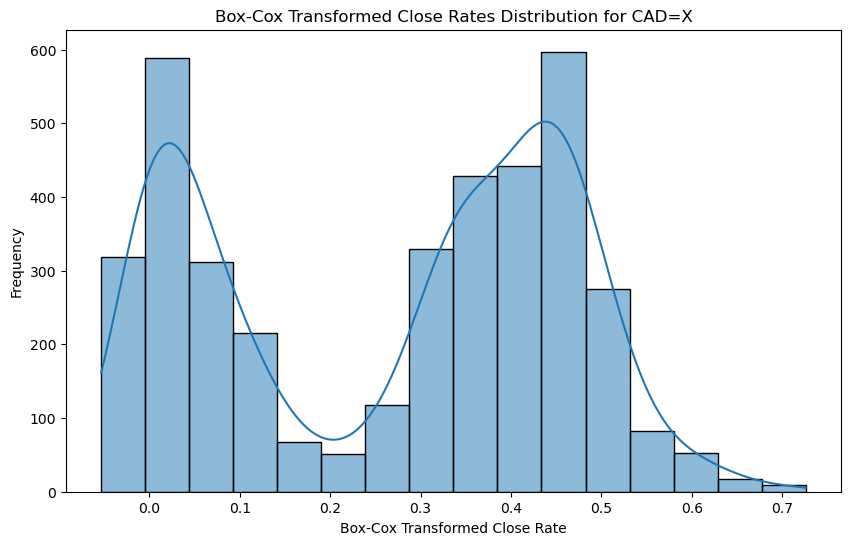

In [16]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the 'CAD=X' ticker
cad_data = df[df['Ticker'] == 'CAD=X'].copy()

# Ensure all 'Close' values are positive if using Box-Cox transformation
cad_data['Close'] = cad_data['Close'] + 1e-9  # Adjust as needed to ensure positivity

# Applying Box-Cox transformation specifically to 'CAD=X' Close values
cad_data['BoxCox_Close'], fitted_lambda = stats.boxcox(cad_data['Close'])

# You can now plot the transformed 'BoxCox_Close' to check for normality
plt.figure(figsize=(10, 6))
sns.histplot(cad_data['BoxCox_Close'], kde=True)
plt.title('Box-Cox Transformed Close Rates Distribution for CAD=X')
plt.xlabel('Box-Cox Transformed Close Rate')
plt.ylabel('Frequency')
plt.show()

Close rates do not appear normally distributed, and running a linear regression model appears unsuitable for this dataset. To continue EDA, Time Series will be examined for an explanation for 

#### Plotting resuiduals

Plotting Residuals to check if running a linear regression baseline would be suitable for the dataset.

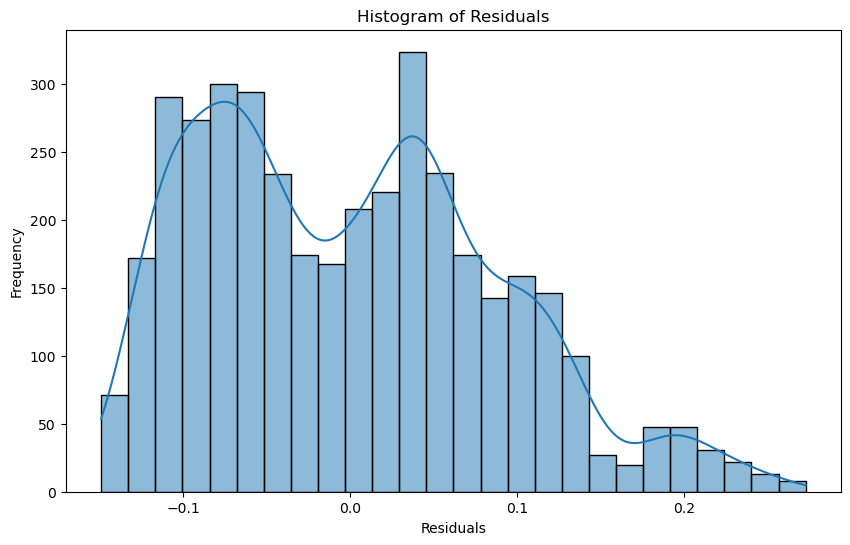

Statistics=0.963, p-value=0.000


In [20]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Convert 'Date' to a numeric sequence
df['Time'] = range(len(df))

# Selecting data for a specific ticker, if needed
df_specific = df[df['Ticker'] == 'CAD=X']

X = sm.add_constant(df_specific['Time'])  # Independent variable
y = df_specific['Close']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Extract and analyze the residuals
residuals = model.resid

# Plotting residuals for visual inspection
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Statistics={stat:.3f}, p-value={p_value:.3f}')

Running the Shapiro Wilk's test on the residuals resulted in:
- test statistic: 0.963 
- p-value: 0

Although, test statistic score is very close to 1 suggesting that the residuals are somewhat close to normality, the very low p-value leads us to reject the null hypothesis of normality, which violates linear regression assumptions. 

#### Non-linear model

Considering the above results, an attempt to explore the non-linear relationship between the variables **Time** and **Close** rates will be approached using Time Series Models.

In order to prepare the data to run a time series model, the following need to be addressed:
1. Checking NaNs in the dataset (handle them if yes)
2. Handling weekend and public holidays
3. Set the correct index for time series modeling
4. Checks for stationarity, seasonality and trends, outliers

In [23]:
#  1. Checking for NaNs / null values
missing = df.isna().sum()
missing

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Time         0
dtype: int64

Proceeding with the next steps as there are no missing values/ NaNs

2. Handling weekends and public holidays

The most often used approach for financial data, is to ignore these missing dates which will be handled well by models such as ARIMA that focus on the order of the data and not fixed intervals. However, for visualization purposes these values could be forward filled as required.

3. In the current dataset, **Date** variable is a column. But to run a time series model, it will need to be set as the index

In [24]:
# Set 'Date' column as the DataFrame's index
df.set_index('Date', inplace=True)

In [25]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,GBP=X,0.50441,0.5068,0.50396,0.50651,0.50651,0
2008-08-01,AUD=X,1.06430,1.0765,1.06390,1.07270,1.07270,1
2008-08-01,CAD=X,1.02340,1.0294,1.02290,1.02460,1.02460,2
2008-08-01,CHF=X,1.04800,1.0512,1.04640,1.05040,1.05040,3
2008-08-01,CNY=X,6.83600,6.8554,6.82100,6.84700,6.84700,4


We will only focus on one currency pair: **CAD=X**, we will filter out only data for this currency pair.

In [26]:
# Filter for 'CAD=X'
cad_df = df[df['Ticker'] == 'CAD=X'].copy()

We will now forward fill for visualization purposes

In [28]:
# Resampling to daily frequency with forward fill
cad_daily_ffill = cad_df.resample('D').ffill()

In [36]:
cad_daily_ffill.head(33)

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-02,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-03,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26
2008-08-08,CAD=X,1.0519,1.0699,1.0519,1.0673,1.0673,34
2008-08-09,CAD=X,1.0519,1.0699,1.0519,1.0673,1.0673,34


In [29]:
# import necessary libraries for plotting
import plotly.express as px
from plotly.subplots import make_subplots

In [31]:
# Plotting the original 'Close' rates
fig = px.line(cad_df, x=cad_df.index, y="Close", title='Original Close Rates for CAD=X')
fig.update_layout(
    yaxis_title="Close Rate", 
    xaxis_title="Date",
    legend_title="",
    title="Original vs. Forward-Filled Close Rates for CAD=X"
)

# Adding the forward-filled 'Close' rates to the same plot for comparison
fig.add_scatter(x=cad_daily_ffill.index, y=cad_daily_ffill["Close"], mode='lines', name='Forward-Filled')

fig.show()